# Importing Libraries:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from scipy.stats import boxcox

# 1] Problem Statement:

# 2] Data Gathering:

In [3]:
df = pd.read_csv(r"E:\DataScience_Notes06_06_022\DataSets\Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 3,4] EDA,Feature Engg.:

##### Handling Missing Values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.drop('No',axis=1,inplace=True)

In [6]:
col = df.columns.tolist()

In [7]:
col_list = []
for i in col:
    data = i.split(" ",1)
    join = data[1].replace(" ","_")
    col_list.append(join)
col_list    

['transaction_date',
 'house_age',
 'distance_to_the_nearest_MRT_station',
 'number_of_convenience_stores',
 'latitude',
 'longitude',
 'house_price_of_unit_area']

In [8]:
new_df = df.copy()

In [9]:
new_df.columns=col_list

In [10]:
new_df

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


##### Handling Outliers:

##### 1] transaction date:

<AxesSubplot: xlabel='transaction_date'>

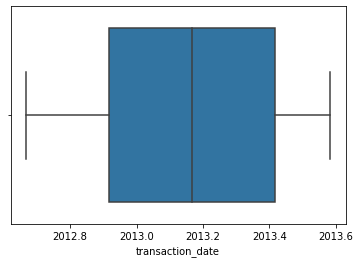

In [11]:
sns.boxplot(x = new_df['transaction_date'])

##### 2] house age:

<AxesSubplot: xlabel='house_age'>

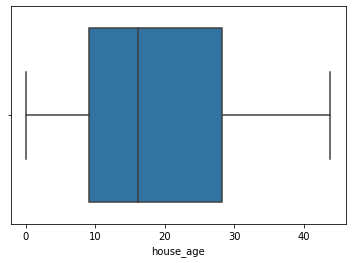

In [12]:
sns.boxplot(x = new_df['house_age'])

##### 3] distance to the nearest MRT station:

<AxesSubplot: xlabel='distance_to_the_nearest_MRT_station'>

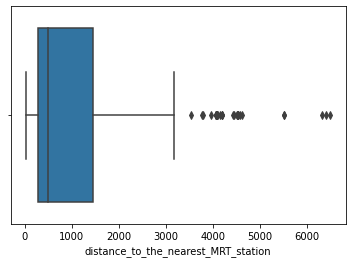

In [13]:
sns.boxplot(x = new_df['distance_to_the_nearest_MRT_station'])

<AxesSubplot: xlabel='distance_to_the_nearest_MRT_station'>

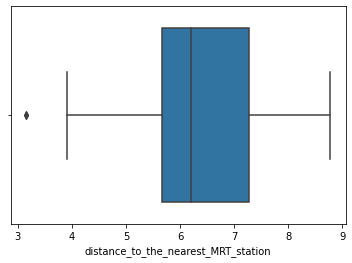

In [14]:
sns.boxplot(x = np.log(new_df['distance_to_the_nearest_MRT_station']))

In [15]:
new_df['distance_to_the_nearest_MRT_station'] = np.log(new_df['distance_to_the_nearest_MRT_station'])

<AxesSubplot: xlabel='distance_to_the_nearest_MRT_station'>

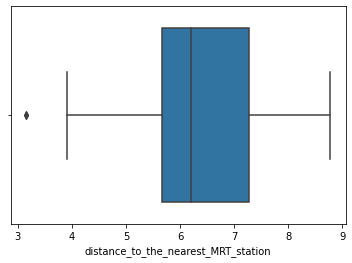

In [16]:
sns.boxplot(x = new_df['distance_to_the_nearest_MRT_station'])

##### 4] number of convenience stores:

<AxesSubplot: xlabel='number_of_convenience_stores'>

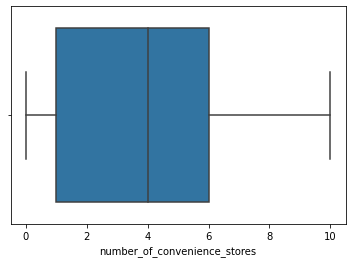

In [17]:
sns.boxplot(x = new_df['number_of_convenience_stores'])

##### 5] latitude:

<AxesSubplot: xlabel='latitude'>

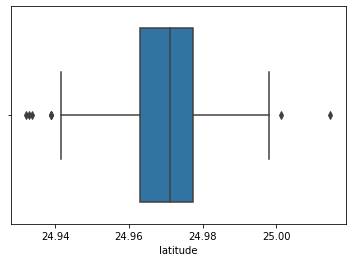

In [18]:
sns.boxplot(x = new_df['latitude'])

##### 6] longitude:

<AxesSubplot: xlabel='longitude'>

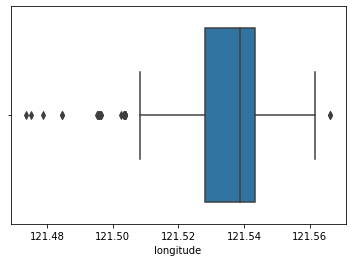

In [19]:
sns.boxplot(x = new_df['longitude'])

In [20]:
Q1 = new_df['longitude'].quantile(0.25)
Q3 = new_df['longitude'].quantile(0.75)

IQR = Q3 - Q1

lower_tail = Q1 - 1.5*IQR
upper_tail = Q3 + 1.5*IQR
print("Lower_Tail:",lower_tail)
print("Upper_Tail:",upper_tail)

Lower_Tail: 121.505255
Upper_Tail: 121.566135


In [21]:
new_df['longitude'] = np.where(new_df['longitude'] <= lower_tail,lower_tail,new_df['longitude'])

<AxesSubplot: xlabel='longitude'>

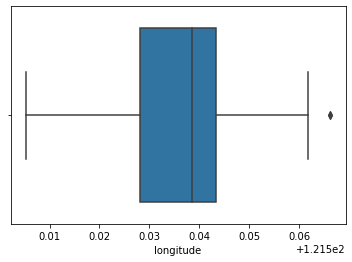

In [22]:
sns.boxplot(x = new_df['longitude'])

##### 7] house price of unit area:

<AxesSubplot: xlabel='house_price_of_unit_area'>

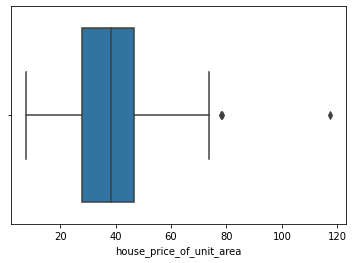

In [23]:
sns.boxplot(x = new_df['house_price_of_unit_area'])

# 5] Feature Selection:

##### 5.1] Linearity:

<AxesSubplot: >

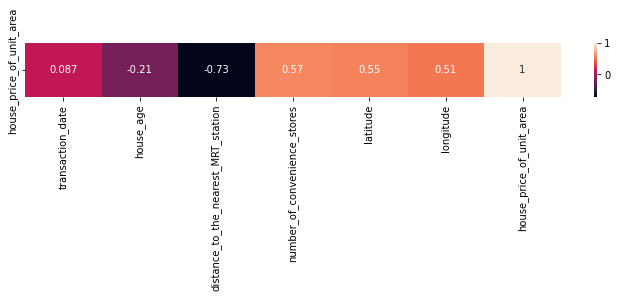

In [24]:
plt.figure(figsize=(12,1))
sns.heatmap(new_df.corr().tail(1),annot=True)

##### 5.2] No Multicollinearity:

In [25]:
for i in range(new_df.shape[1]-1):
    vif = variance_inflation_factor(new_df,i)
    print(f"VIF for {new_df.columns[i]}:",vif)

VIF for transaction_date: 39400708.03671797
VIF for house_age: 3.8627836658182466
VIF for distance_to_the_nearest_MRT_station: 114.85436651270467
VIF for number_of_convenience_stores: 5.941824924739129
VIF for latitude: 6238818.81990374
VIF for longitude: 44414696.18838369


# 6] Model Training:

##### Train Test Split:

In [26]:
x = new_df.drop('house_price_of_unit_area',axis=1)
y = new_df['house_price_of_unit_area']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# 7] Evalution Matrix:

In [28]:
# Training
y_pred_train = lin_reg.predict(x_train)

print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("R2 Score:",r2_score(y_train,y_pred_train))

Mean Squared Error: 66.17333798032334
Root Mean Squared Error: 8.134699624468217
Mean Absolute Error: 5.232908587353276
R2 Score: 0.6553675924792022


In [29]:
#Testing

y_pred_test = lin_reg.predict(x_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("R2 Score:",r2_score(y_test,y_pred_test))

Mean Squared Error: 61.243550160359796
Root Mean Squared Error: 7.825825845261304
Mean Absolute Error: 5.260237206484814
R2 Score: 0.632146178686326


##### 1] Normaliztion:

In [30]:
normal = MinMaxScaler()
arr1 = normal.fit_transform(x)
normal_xdf = pd.DataFrame(arr1, columns=x.columns)
normal_xdf

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
0,0.272926,0.730594,0.229166,1.0,0.616941,0.573384
1,0.272926,0.445205,0.457458,0.9,0.584949,0.561419
2,1.000000,0.303653,0.565168,0.5,0.671231,0.633533
3,0.909389,0.303653,0.565168,0.5,0.671231,0.633533
4,0.181223,0.114155,0.500488,0.5,0.573194,0.609604
...,...,...,...,...,...,...
409,0.363537,0.312785,0.917634,0.0,0.114881,0.000000
410,0.000000,0.127854,0.240478,0.9,0.512118,0.620257
411,0.636463,0.429224,0.500671,0.7,0.571498,0.567156
412,0.363537,0.184932,0.266659,0.5,0.420141,0.580431


In [31]:
x_train,x_test,y_train,y_test = train_test_split(normal_xdf,y,test_size=0.33, random_state=10)

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

# Training
y_pred_train = lin_reg.predict(x_train)

print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("R2 Score:",r2_score(y_train,y_pred_train))
print("*"*50)
#Testing

y_pred_test = lin_reg.predict(x_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("R2 Score:",r2_score(y_test,y_pred_test))

Mean Squared Error: 66.17333798032746
Root Mean Squared Error: 8.13469962446847
Mean Absolute Error: 5.2329085873534655
R2 Score: 0.6553675924791806
**************************************************
Mean Squared Error: 61.24355016036605
Root Mean Squared Error: 7.825825845261703
Mean Absolute Error: 5.260237206485526
R2 Score: 0.6321461786862885


In [33]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

# Training
y_pred_train = knn_reg.predict(x_train)

print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("R2 Score:",r2_score(y_train,y_pred_train))
print("*"*50)
#Testing

y_pred_test = knn_reg.predict(x_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("R2 Score:",r2_score(y_test,y_pred_test))

Mean Squared Error: 50.23634512635379
Root Mean Squared Error: 7.087760233413218
Mean Absolute Error: 4.65797833935018
R2 Score: 0.7383678518516166
**************************************************
Mean Squared Error: 59.45276496350366
Root Mean Squared Error: 7.710561909712136
Mean Absolute Error: 5.5655474452554765
R2 Score: 0.6429023673150164


In [34]:
knn_reg_mdl = KNeighborsRegressor()
hyperparameter = {'n_neighbors':np.arange(3,21),
                  'p':[1,2]}
gscv = GridSearchCV(knn_reg_mdl,hyperparameter,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=13, p=1)

In [35]:
knn_reg_mdl = KNeighborsRegressor(n_neighbors=13, p=1)
knn_reg_mdl.fit(x_train,y_train)

# Training
y_pred_train = knn_reg_mdl.predict(x_train)

print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("R2 Score:",r2_score(y_train,y_pred_train))
print("*"*50)
#Testing

y_pred_test = knn_reg_mdl.predict(x_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("R2 Score:",r2_score(y_test,y_pred_test))

Mean Squared Error: 58.76941127464594
Root Mean Squared Error: 7.666121005739861
Mean Absolute Error: 4.770091641210775
R2 Score: 0.6939274288659334
**************************************************
Mean Squared Error: 57.59727378741417
Root Mean Squared Error: 7.589286777254775
Mean Absolute Error: 5.292756878158338
R2 Score: 0.6540472065307565


##### 2] Standrediztion:

In [36]:
std = StandardScaler()
arr2 = std.fit_transform(x)
std_xdf = pd.DataFrame(arr2, columns=x.columns)
std_xdf

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
0,-0.823683,1.255628,-1.744066,2.007407,1.125430,0.455200
1,-0.823683,0.157086,-0.595682,1.667503,0.912444,0.402164
2,1.541151,-0.387791,-0.053862,0.307885,1.486860,0.721833
3,1.246435,-0.387791,-0.053862,0.307885,1.486860,0.721833
4,-1.121951,-1.117223,-0.379225,0.307885,0.834188,0.615761
...,...,...,...,...,...,...
409,-0.528967,-0.352637,1.719160,-1.391638,-2.216993,-2.086536
410,-1.711384,-1.064493,-1.687161,1.667503,0.427579,0.662985
411,0.358734,0.095568,-0.378307,0.987694,0.822893,0.427592
412,-0.528967,-0.844784,-1.555462,0.307885,-0.184755,0.486440


In [37]:
x_train,x_test,y_train,y_test = train_test_split(std_xdf,y,test_size=0.33, random_state=10)

In [38]:
knn_reg_mdl = KNeighborsRegressor(n_neighbors=13, p=1)
knn_reg_mdl.fit(x_train,y_train)

# Training
y_pred_train = knn_reg_mdl.predict(x_train)

print("Mean Squared Error:",mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train,y_pred_train))
print("R2 Score:",r2_score(y_train,y_pred_train))
print("*"*50)
#Testing

y_pred_test = knn_reg_mdl.predict(x_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("R2 Score:",r2_score(y_test,y_pred_test))

Mean Squared Error: 57.796797470788036
Root Mean Squared Error: 7.602420500787104
Mean Absolute Error: 4.744348792002222
R2 Score: 0.6989928260038438
**************************************************
Mean Squared Error: 55.94647475489137
Root Mean Squared Error: 7.479737612703494
Mean Absolute Error: 5.286412128017967
R2 Score: 0.6639625809782599


# 8] Framework Development:

In [39]:
new_df.head(1).T

,0
transaction_date,2012.917000
house_age,32.000000
distance_to_the_nearest_MRT_station,4.441225
number_of_convenience_stores,10.000000
latitude,24.982980
longitude,121.540240
house_price_of_unit_area,37.900000


In [54]:
import warnings
warnings.filterwarnings('ignore')

transaction_date = 2014.989
house_age = 7.000000
distance_to_the_nearest_MRT_station = 3.67
number_of_convenience_stores = 5.46
latitude = 24.5778
longitude = 121.98664

test_array = np.zeros(len(lin_reg.coef_))
test_array[0] = transaction_date
test_array[1] = house_age
test_array[2] = np.log(distance_to_the_nearest_MRT_station)
test_array[3] = number_of_convenience_stores
test_array[4] = latitude
test_array[5] = longitude

inputs = normal.transform([test_array])
print(inputs)

def get_prediction(x):
    prediction = np.around(knn_reg_mdl.predict(x)[0],2)
    print(f"The House Price Is '{prediction}'Rs. Per Unit Area.")
get_prediction(inputs)

[[ 2.5349345   0.15981735 -0.32916923  0.546      -4.29314106  7.88961731]]
The House Price Is '40.15'Rs. Per Unit Area.


In [41]:
import pickle

with open('knnmodel.pkl','wb') as f:
    pickle.dump(knn_reg_mdl,f)

In [42]:
with open('sacler.pkl','wb') as f:
    pickle.dump(normal,f)

In [43]:
len(knn_reg_mdl.feature_names_in_)

6